# Digital Signal Processing
## Homework Assignment №2
---
## Anton Buguev BS19-RO-01
#### a.buguev@innopolis.university
#### 8 May 2022

## Task 1: Moving Average Filter.

### Step 1: Find system function for $M=3$.
System function for $M=3$ looks the following way:
$$H=\frac{\mathcal{Y}(z)}{\mathcal{X}(z)}=\frac{1}{3}+\frac{1}{3}z^{-1}+\frac{1}{3}z^{-2}=\frac{z^2+z+1}{3z^2}$$

In [1]:
from numpy import roots,linspace, arange, zeros
from numpy import cos, sin, arctan2, pi, abs, sqrt, log10, maximum
from numpy.fft import fft, fftshift
import matplotlib.pyplot as plt

sys_zeros = roots([1,1,1]) # zeros of system function
sys_poles = roots([3,0,0]) # poles of system function

### Step 2: Find zeros and poles.

Zeros of system function are $\frac{-1+j\sqrt{3}}{2}$ and $\frac{-1-j\sqrt{3}}{2}$. And pole is $0$.

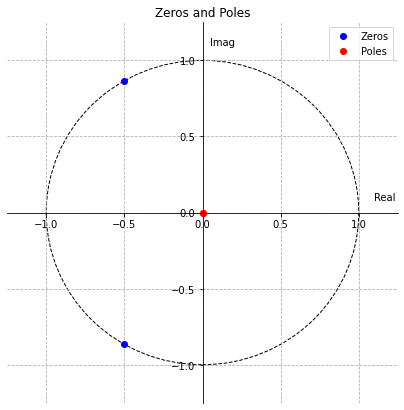

In [2]:
# Function to draw zeros and poles on comples plane
def plot_zeros_poles(fun_zeros, fun_poles):
    zeros_real, zeros_imag = fun_zeros.real, fun_zeros.imag # real and imaginary parts of zeros
    poles_real, poles_imag = fun_poles.real, fun_poles.imag # real and imaginary parts of poles
    
    # Visualize zeros and poles
    fig, ax = plt.subplots(1, 1, figsize=(7,7))

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    ax.text(1.1, 0.1, r'Real', fontsize=10, verticalalignment='center')
    ax.text(0.13, 1.1, r'Imag', fontsize=10, horizontalalignment='center')

    ax.set_xlim(-1.25, 1.25)
    ax.set_ylim(-1.25, 1.25)
    ax.plot(zeros_real, zeros_imag, 'o', c='blue', label="Zeros")
    ax.plot(poles_real, poles_imag, 'o', c='red', label="Poles")
    circle = plt.Circle((0, 0), 1, fill = False, ls='--')
    ax.add_artist(circle)
    ax.legend()
    ax.set_title('Zeros and Poles')
    ax.grid(linestyle='--')
    
    plt.show()

plot_zeros_poles(sys_zeros, sys_poles)

### Step 3: Find magnitude and argument of system function.

System function in frequency domain in general form:
$$H(\omega) = \frac{e^{-j\omega (N-1)/2}}{N}\cdot\frac{\sin{\frac{\omega N}{2}}}{\sin{\frac{\omega}{2}}}$$

System function in frequency domain for $M=3$:
$$H(\omega) = \frac{e^{-j\omega}}{3}\cdot\frac{\sin{\frac{3\omega}{2}}}{\sin{\frac{\omega}{2}}}$$

And knowing that $e^{\pm j\omega} = \cos{\omega}\pm j\sin{\omega}$ we get:
$$H(\omega) = \frac{\sin{\frac{3\omega}{2}}}{3\sin{\frac{\omega}{2}}} (\cos{\omega} - j\sin{\omega})$$

Magnitude of system function:
$$|H(\omega)| = \sqrt{(Re(H(\omega))^2 + (Im(H(\omega))^2)}$$

Argument of system function:
$$arg(H(\omega)) = \arctan\Big(\frac{Im(H(\omega)}{Re(H(\omega)}\Big)$$

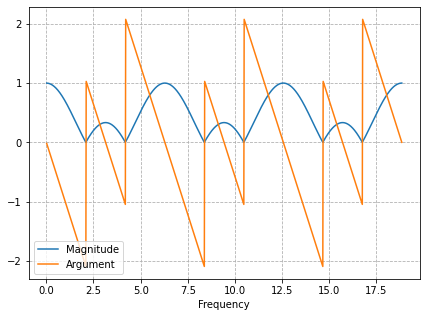

In [3]:
# Function to compute magnitude and argument of system function
# for any M when z=exp(jw)
def magn_arg(omega, M):
    magn = []
    arg = []
    for om in omega: 
        H = sin(M*om/2)/(M*sin(om/2))*complex(cos(om*(M-1)/2),-sin(om*(M-1)/2))
        magn.append(sqrt(H.real**2 + H.imag**2))
        arg.append(arctan2(H.imag, H.real))
    return magn, arg

# frequency
omega = linspace(0, 6*pi, 1000)[1:] # to avoid 0 in denumerator let us start from 2nd element in array
magn, arg = magn_arg(omega, 3) 

# plot result
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(omega, magn, label="Magnitude")
ax.plot(omega, arg, label="Argument")
ax.set_xlabel("Frequency")
ax.legend(loc='lower left')
ax.grid(linestyle='--')

### Step 4: Compute $x(t)=\cos{\frac{\pi t}{2}}$ for 30 points.

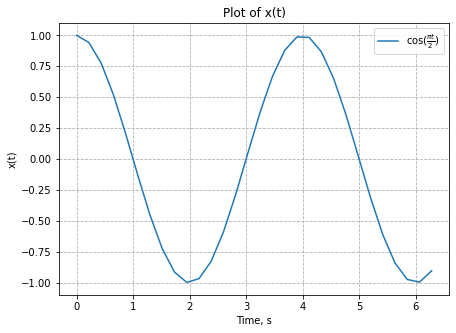

In [4]:
# Function to compute x(t)=cos(pi*t/2)
def x_t(t_arr):
    x_arr = zeros(t_arr.shape)
    for i in range(len(t_arr)):
        x_arr[i] = (cos(0.5 * pi * t_arr[i]))
    return x_arr

M = 30 # number of points
t_arr = linspace(0, 2*pi, M) # time array
x_arr = x_t(t_arr)

# plot function
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(t_arr, x_arr, label=r"cos($\frac{\pi t}{2}$)")
ax.legend()
ax.set_xlabel("Time, s")
ax.set_ylabel("x(t)")
ax.set_title("Plot of x(t)")
ax.grid(linestyle='--')

### Step 5: Implement Moving Average Filter (MAF) for any value of $M$.

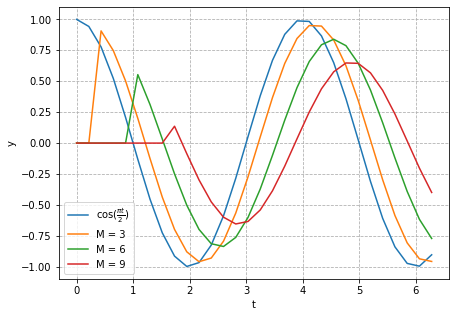

In [5]:
# Function to compute MAF for any value of M
def MAF(x, M):
    # y = zeros(x.shape) # output list, initially all elements zero
    # for i in range(M - 1, len(x)): # start from M-th element
    #     y[i] = sum(x[i - (M - 1) : i + 1]) / M # take slice, find sum and didvide by M
    # return y
    y = [0] * (M - 1)
    for i in range(M - 1, len(x)):
        temp = 0
        for j in range((i - M) + 1, i + 1):
            temp += x[j]
        temp /= M
        y.append(temp)
    return y

# compute filter for different values of M
y3 = MAF(x_arr, 3)
y6 = MAF(x_arr, 6)
y9 = MAF(x_arr, 9)

# plot result
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(t_arr, x_arr, label=r"cos($\frac{\pi t}{2}$)") # intitial function
# filtered functions
ax.plot(t_arr, y3, label="M = 3")
ax.plot(t_arr, y6, label="M = 6")
ax.plot(t_arr, y9, label="M = 9")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("y")
ax.grid(linestyle='--')

## Task 2

### 1. The Bartlett window.

The Bartlett window can be computed using equation:

$$\omega(n) = \frac{2}{M-1}\Bigg(\frac{M-1}{2}-\bigg|n-\frac{M-1}{2}\bigg|\Bigg)$$

In [6]:
# Function to compute frequency response
# as in example from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.bartlett.html
def compute_freq_resp(window):
    A = fft(window, 2048) / (len(window) / 2)
    freq = linspace(-0.5, 0.5, len(A))
    response = 20 * log10(abs(fftshift(A / abs(A).max())))
    return response, freq

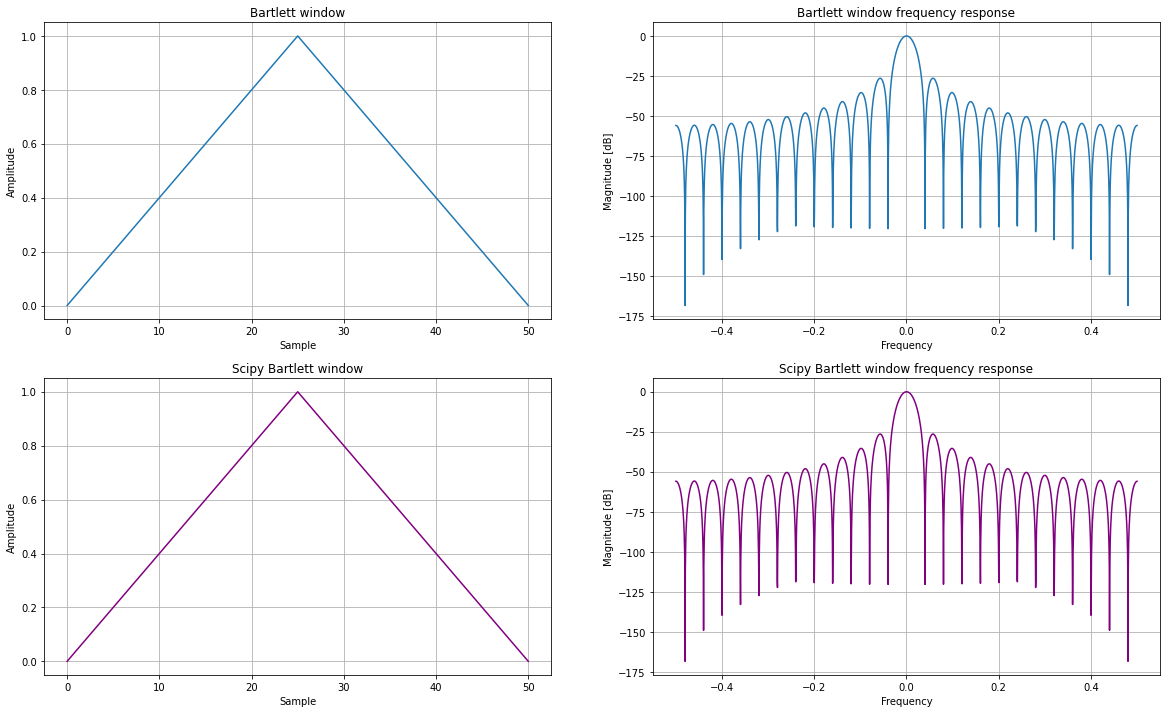

In [7]:
from scipy import signal

# Function to compute Bartlett window
def barlett_window(M):
    n_arr = arange(0, M, 1) # values of n
    window = []
    for n in n_arr:
        window.append(2 / (M - 1) * ((M - 1) / 2 - abs(n - (M - 1) / 2)))
    return window

M = 51 # number of steps
bartlett = barlett_window(M) # computed Bartlett window
bartlett_resp, freq = compute_freq_resp(bartlett) # frequency response

# Visualize computed values
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0, 0].plot(bartlett)
ax[0, 0].set_xlabel("Sample")
ax[0, 0].set_ylabel("Amplitude")
ax[0, 0].set_title("Bartlett window")
ax[0, 0].grid()

ax[0, 1].plot(freq, bartlett_resp)
ax[0, 1].set_xlabel("Frequency")
ax[0, 1].set_ylabel("Magnitude [dB]")
ax[0, 1].set_title("Bartlett window frequency response")
ax[0, 1].grid()


signal_bartlett = signal.windows.bartlett(M) # compute Bartlett window using scipy
signal_bartlett_resp, freq = compute_freq_resp(signal_bartlett) # frequency response of window from scipy

# Visualize scipy window
ax[1, 0].plot(signal_bartlett, c='purple')
ax[1, 0].set_xlabel("Sample")
ax[1, 0].set_ylabel("Amplitude")
ax[1, 0].set_title("Scipy Bartlett window")
ax[1, 0].grid()

ax[1, 1].plot(freq, signal_bartlett_resp, c='purple')
ax[1, 1].set_xlabel("Frequency")
ax[1, 1].set_ylabel("Magnitude [dB]")
ax[1, 1].set_title("Scipy Bartlett window frequency response")
ax[1, 1].grid()

### 2. The Blackman window.

The Blackman window can be computed using equation:

$$\omega(n) = 0.42 - 0.5\cos{\frac{2\pi n}{M}} + 0.08\cos{\frac{4\pi n}{M}}$$

C:\Users\bugue\AppData\Local\Temp/ipykernel_16688/3196554788.py:6: RuntimeWarning: divide by zero encountered in log10
  response = 20 * log10(abs(fftshift(A / abs(A).max())))
C:\Users\bugue\AppData\Local\Temp/ipykernel_16688/3196554788.py:6: RuntimeWarning: divide by zero encountered in log10
  response = 20 * log10(abs(fftshift(A / abs(A).max())))


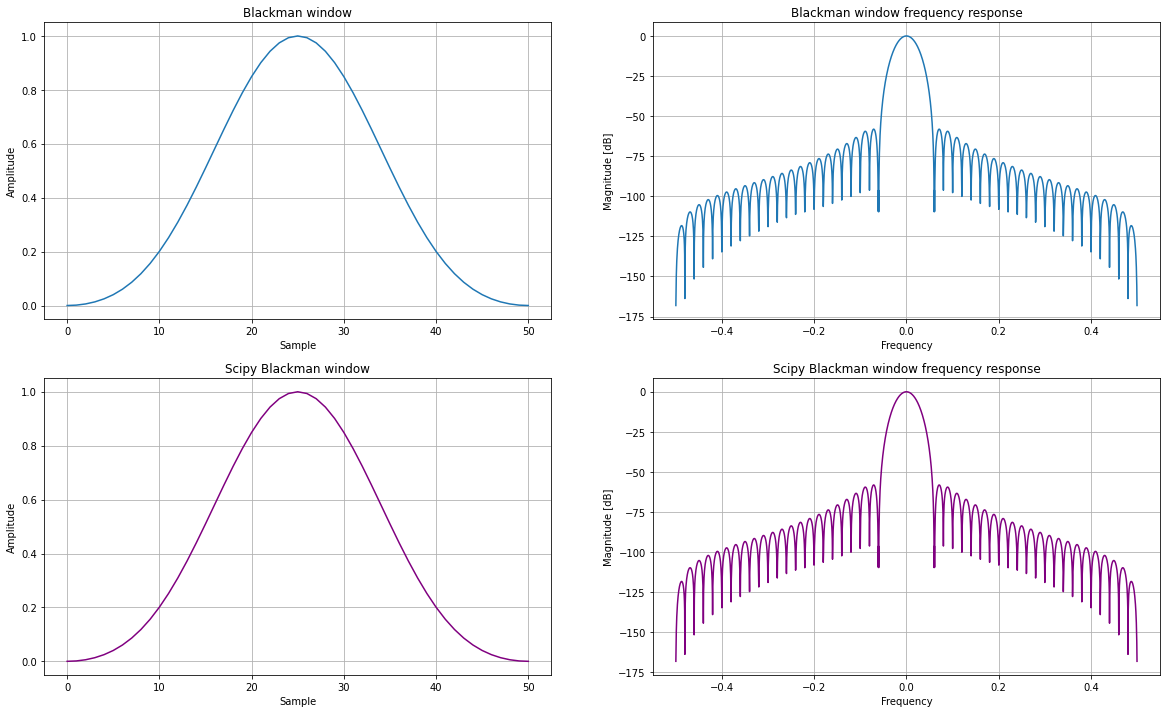

In [13]:
# Function to compute Blackman window
def blackman_window(M):
    n_arr = linspace(0, M, M) # values of n
    blackman = []
    for n in n_arr:
        blackman.append(0.42-0.5*cos(2*pi*n/M)+0.08*cos(4*pi*n/M))
    return blackman

M = 51 # number of steps
blackman = blackman_window( M) # computed Blackman window
blackman_resp, freq = compute_freq_resp(blackman) # frequency response

# Visualize computed values
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0, 0].plot(blackman)
ax[0, 0].set_xlabel("Sample")
ax[0, 0].set_ylabel("Amplitude")
ax[0, 0].set_title("Blackman window")
ax[0, 0].grid()

ax[0, 1].plot(freq, blackman_resp)
ax[0, 1].set_xlabel("Frequency")
ax[0, 1].set_ylabel("Magnitude [dB]")
ax[0, 1].set_title("Blackman window frequency response")
ax[0, 1].grid()

signal_blackman = signal.windows.blackman(M) # compute Blackman window using scipy
signal_blackman_resp, freq = compute_freq_resp(signal_blackman) # frequency response of window from scipy

# Visualize scipy window
ax[1, 0].plot(signal_blackman, c='purple')
ax[1, 0].set_xlabel("Sample")
ax[1, 0].set_ylabel("Amplitude")
ax[1, 0].set_title("Scipy Blackman window")
ax[1, 0].grid()

ax[1, 1].plot(freq, signal_blackman_resp, c='purple')
ax[1, 1].set_xlabel("Frequency")
ax[1, 1].set_ylabel("Magnitude [dB]")
ax[1, 1].set_title("Scipy Blackman window frequency response")
ax[1, 1].grid()

### 3. The Hamming window.

The Hamming window can be computed using equation:

$$\omega(n) = 0.54 - 0.46\cos{\frac{2\pi n}{M-1}}$$

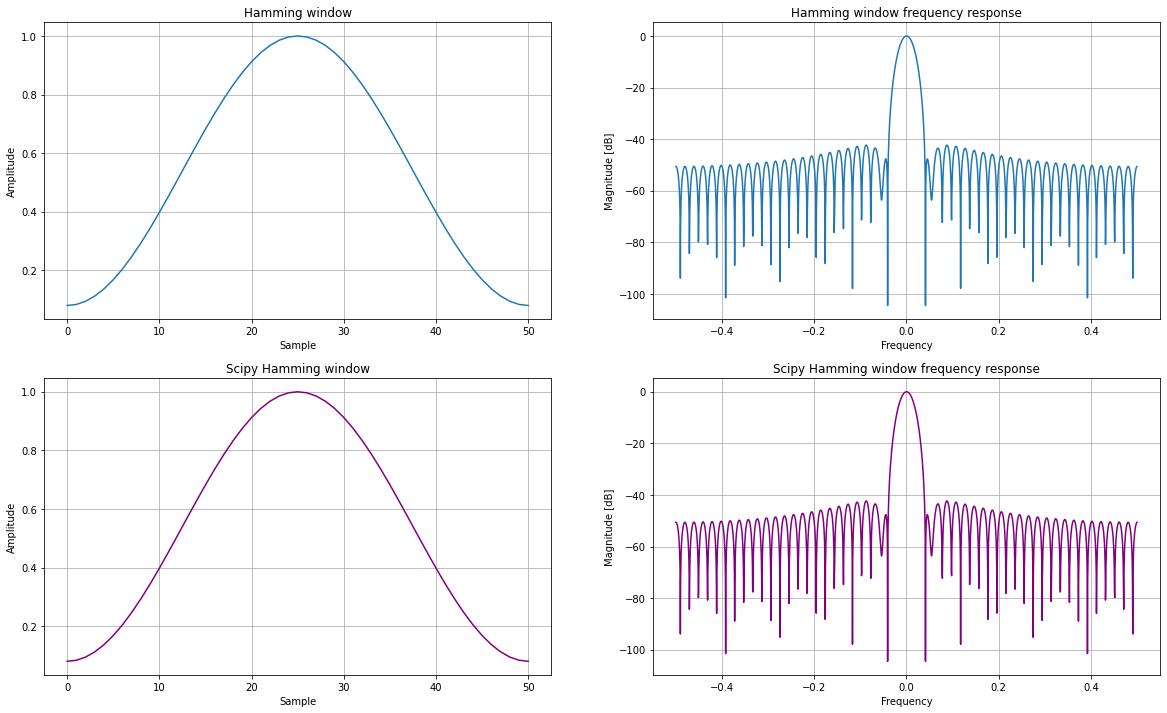

In [9]:
# Function to compute Hamming window
def hamming_window(M):
    n_arr = linspace(0, M, M) # values of n
    hamming = []
    n_arr = arange(0, M, 1)
    for n in n_arr:
        hamming.append(0.54-0.46*cos(2*pi*n/(M-1)))
    return hamming

M = 51 # number of steps
hamming = hamming_window(M) # computed Hamming window
hamming_resp, freq = compute_freq_resp(hamming) # frequency response

# Visualize computed values
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0, 0].plot(hamming)
ax[0, 0].set_xlabel("Sample")
ax[0, 0].set_ylabel("Amplitude")
ax[0, 0].set_title("Hamming window")
ax[0, 0].grid()

ax[0, 1].plot(freq, hamming_resp)
ax[0, 1].set_xlabel("Frequency")
ax[0, 1].set_ylabel("Magnitude [dB]")
ax[0, 1].set_title("Hamming window frequency response")
ax[0, 1].grid()

signal_hamming = signal.windows.hamming(M) # compute Hamming window using scipy
signal_hamming_resp, freq = compute_freq_resp(signal_hamming) # frequency response of window from scipy

# Visualize scipy window
ax[1, 0].plot(signal_hamming, c='purple')
ax[1, 0].set_xlabel("Sample")
ax[1, 0].set_ylabel("Amplitude")
ax[1, 0].set_title("Scipy Hamming window")
ax[1, 0].grid()

ax[1, 1].plot(freq, signal_hamming_resp, c='purple')
ax[1, 1].set_xlabel("Frequency")
ax[1, 1].set_ylabel("Magnitude [dB]")
ax[1, 1].set_title("Scipy Hamming window frequency response")
ax[1, 1].grid()

### 4. The Hann window.

The Hann window can be computed using equation:

$$\omega(n) = 0.5 - 0.5\cos{\frac{2\pi n}{M-1}}$$

C:\Users\bugue\AppData\Local\Temp/ipykernel_16688/3196554788.py:6: RuntimeWarning: divide by zero encountered in log10
  response = 20 * log10(abs(fftshift(A / abs(A).max())))
C:\Users\bugue\AppData\Local\Temp/ipykernel_16688/3196554788.py:6: RuntimeWarning: divide by zero encountered in log10
  response = 20 * log10(abs(fftshift(A / abs(A).max())))


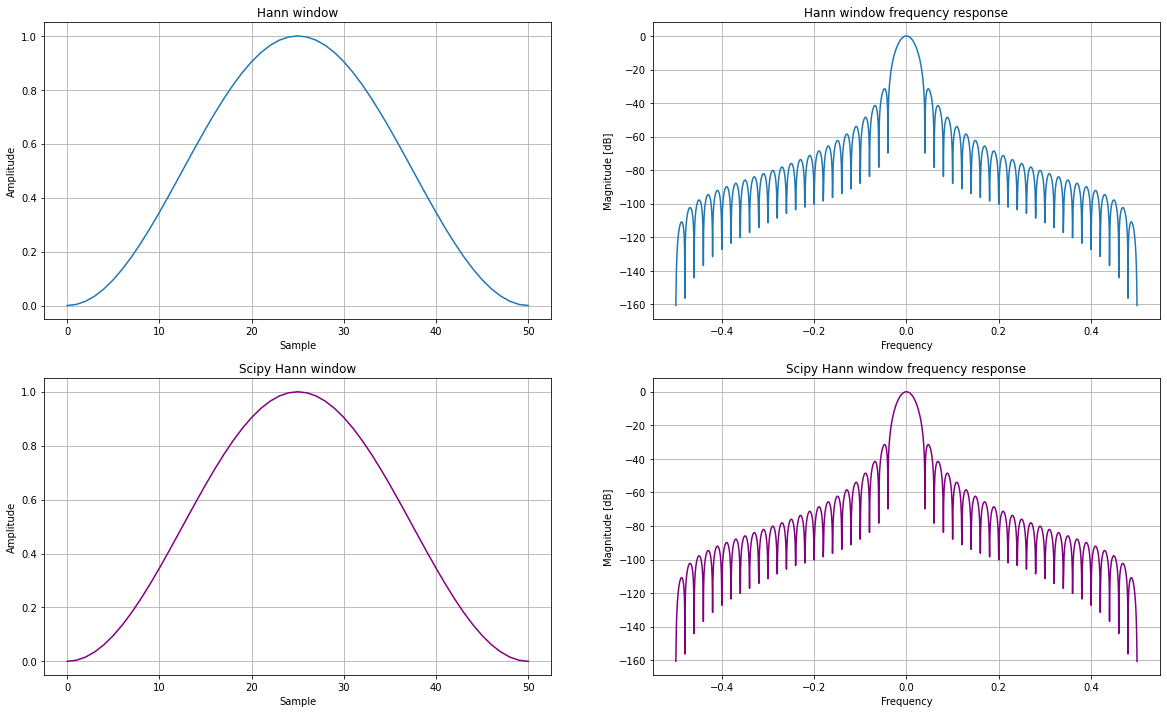

In [10]:
# Function to compute Hann window
def hann_window(M):
    n_arr = linspace(0, M, M) # values of n
    hann = []
    n_arr = arange(0, M, 1)
    for n in n_arr:
        hann.append(0.5-0.5*cos(2*pi*n/(M-1)))
    return hann

M = 51 # number of steps
hann = hann_window(M) # computed Hann window
hann_resp, freq = compute_freq_resp(hann) # frequency response

# Visualize computed values
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0, 0].plot(hann)
ax[0, 0].set_xlabel("Sample")
ax[0, 0].set_ylabel("Amplitude")
ax[0, 0].set_title("Hann window")
ax[0, 0].grid()

ax[0, 1].plot(freq, hann_resp)
ax[0, 1].set_xlabel("Frequency")
ax[0, 1].set_ylabel("Magnitude [dB]")
ax[0, 1].set_title("Hann window frequency response")
ax[0, 1].grid()

signal_hann = signal.windows.hann(M) # compute Hann window using scipy
signal_hann_resp, freq = compute_freq_resp(signal_hann) # frequency response of window from scipy 
# Visualize scipy window
ax[1, 0].plot(signal_hann, c='purple')
ax[1, 0].set_xlabel("Sample")
ax[1, 0].set_ylabel("Amplitude")
ax[1, 0].set_title("Scipy Hann window")
ax[1, 0].grid()

ax[1, 1].plot(freq, signal_hann_resp, c='purple')
ax[1, 1].set_xlabel("Frequency")
ax[1, 1].set_ylabel("Magnitude [dB]")
ax[1, 1].set_title("Scipy Hann window frequency response")
ax[1, 1].grid()